# Weather Forecast

## ML Pipeline using Linear Regression

The notebook illustrates how we process and create the ML pipeline as can be seen in `weather-forecast_pipeline.ipynb`.

## Problem and Dataset

**Problem** 

Implementing weather forecast pipeline.

**Dataset**

Each `.csv` file include data recorded in 6 months (=26.2K rows).

Each row includes these columns:
1. DateTime: the time each data point is recorded.
1. P (mbar): The pascal SI derived unit of pressure used to quantify internal pressure. Meteorological reports typically state atmospheric pressure in millibars.
1. T (degC): Temperature in Celsius.
1. Tpot (K): Temperature in Kelvin.
1. Tdew (degC): Temperature in Celsius relative to humidity. Dew Point is a measure of the absolute amount of water in the air, the DP is the temperature at which the air cannot hold all the moisture in it and water condenses.
1. rh (%): Relative Humidity is a measure of how saturated the air is with water vapor, the %RH determines the amount of water contained within collection objects.
1. VPmax (mbar): Saturation vapor pressure.
1. VPact (mbar): Vapor pressure.
1. VPdef (mbar): Vapor pressure deficit.
1. sh (g/kg): Specific humidity.
1. H2OC (mmol/mol): Water vapor concentration.
1. rho (g/m\*\*3): Air density
1. wv (m/s): Wind velocity
1. max. wv (m/s): Maximum wind velocity
1. wd (deg): Wind direction
1. rain (mm): Precipitation
1. raining (s): Duration of precipitation
1. SWDR (W/m²): Short wave downward radiation
1. PAR (µmol/m²/s): Photosynthetically active radiation
1. max. PAR ((µmol/m²/s): Maximum photosynthetically active radiation
1. Tlog (degC): Internal logger temperature
1. CO2 (ppm): CO2-concentration of ambient air

## ML workflow:

1. Data processing (Cleansing / Descriptive statistics)
1. Data exploration (EDA / VDA)
1. Data ingestion pipeline (TF.Data)
1. Model training & hyperparameter tuning (TF.Keras)
1. Deployment

### Setup

In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [3]:
csv_path = "mpi_roof_2020a.csv"

df = pd.read_csv(csv_path, encoding="ISO-8859-1", index_col='Date Time', parse_dates=['Date Time'], dayfirst=True)
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [4]:
df.shape

(26200, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26200 entries, 2020-01-01 00:10:00 to 2020-07-01 00:00:00
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   p (mbar)              26200 non-null  float64
 1   T (degC)              26200 non-null  float64
 2   Tpot (K)              26200 non-null  float64
 3   Tdew (degC)           26200 non-null  float64
 4   rh (%)                26200 non-null  float64
 5   VPmax (mbar)          26200 non-null  float64
 6   VPact (mbar)          26200 non-null  float64
 7   VPdef (mbar)          26200 non-null  float64
 8   sh (g/kg)             26200 non-null  float64
 9   H2OC (mmol/mol)       26200 non-null  float64
 10  rho (g/m**3)          26200 non-null  float64
 11  wv (m/s)              26200 non-null  float64
 12  max. wv (m/s)         26200 non-null  float64
 13  wd (deg)              26200 non-null  float64
 14  rain (mm)             26200 non-nul

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),26200.0,991.045784,9.785286,962.08,984.830,992.130,997.3400,1020.07
T (degC),26200.0,9.024058,6.580111,-6.44,3.950,8.315,13.7100,29.44
Tpot (K),26200.0,282.916860,6.809702,266.19,277.800,282.400,287.6925,304.30
Tdew (degC),26200.0,2.961518,5.650818,-13.81,-0.700,2.050,6.1900,20.50
rh (%),26200.0,68.447749,17.685771,21.16,55.300,70.800,82.7000,100.00
VPmax (mbar),26200.0,12.570210,5.913131,3.77,8.110,10.970,15.7100,41.15
VPact (mbar),26200.0,8.130931,3.530990,2.09,5.800,7.080,9.4800,24.16
VPdef (mbar),26200.0,4.439230,4.153690,0.00,1.580,2.970,5.9000,23.18
sh (g/kg),26200.0,5.128258,2.250939,1.30,3.640,4.470,5.9700,15.40
H2OC (mmol/mol),26200.0,8.214292,3.589694,2.09,5.840,7.170,9.5600,24.53


As can be seen, there are some columns with erroneous values `-9999.00`, we will replace it with is previous index value, using forward fill.

In [7]:
df.replace(-9999, np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)
df.min()

p (mbar)                 962.08
T (degC)                  -6.44
Tpot (K)                 266.19
Tdew (degC)              -13.81
rh (%)                    21.16
VPmax (mbar)               3.77
VPact (mbar)               2.09
VPdef (mbar)               0.00
sh (g/kg)                  1.30
H2OC (mmol/mol)            2.09
rho (g/m**3)            1120.92
wv (m/s)                   0.08
max. wv (m/s)              0.00
wd (deg)                   0.00
rain (mm)                  0.00
raining (s)                0.00
SWDR (W/m²)                0.00
PAR (µmol/m²/s)            0.00
max. PAR (µmol/m²/s)       0.00
Tlog (degC)                6.96
CO2 (ppm)                393.90
dtype: float64

It seems like there is no erronous value anymore.

### Data exploration & Feature Engineering

We make `Date Time` as index to visualize any attribute with timeseries lies on x-axis.

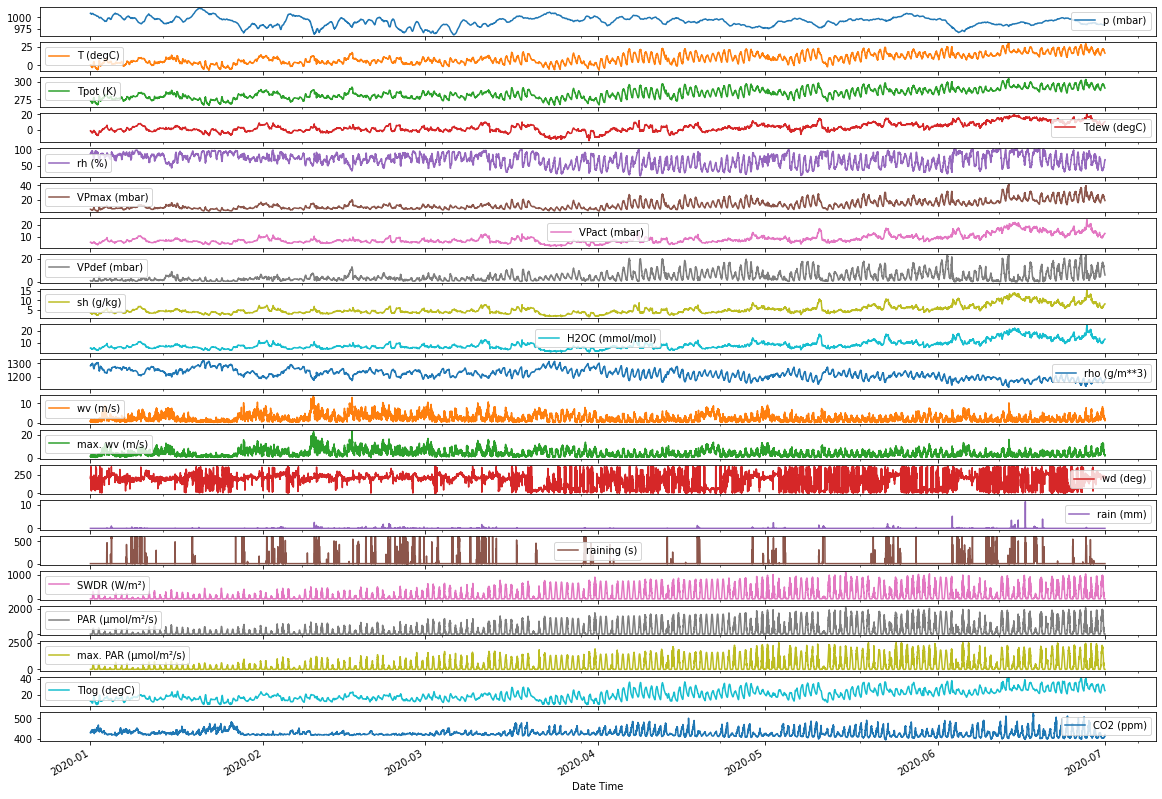

In [8]:
mpl.rcParams['figure.figsize'] = (20, 15)
_ = df.plot(subplots=True)

The column `wd (deg)` gives the wind direction in units of degrees. Angles do not make good model inputs, 360° and 0° should be close to each other, and wrap around smoothly. Direction shouldn't matter if the wind is not blowing.

Right now the distribution of wind data looks like this:

<AxesSubplot:xlabel='wd (deg)', ylabel='wv (m/s)'>

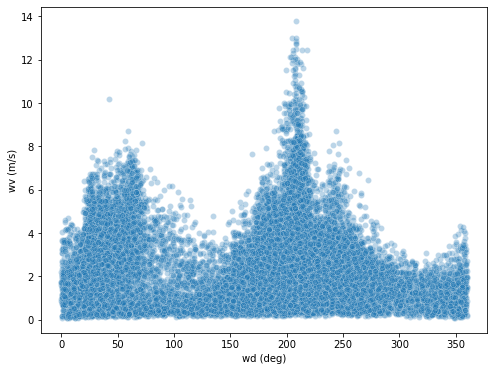

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='wd (deg)', y='wv (m/s)', data=df, alpha=0.3)

After transformation.

In [10]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

<AxesSubplot:xlabel='Wx', ylabel='Wy'>

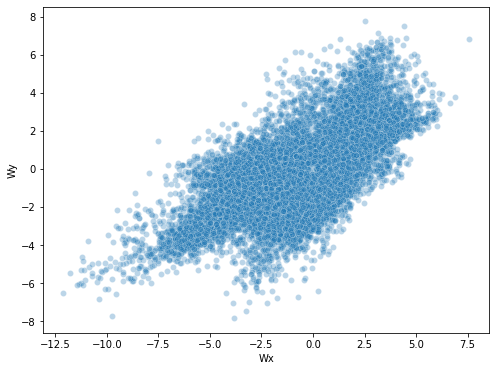

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wx', y='Wy', data=df, alpha=0.3)

Normally, weather in a year and a day might not similar. Therefore, `Date Time` column is very useful.

However, we should use `sin` and `cos` to convert the time to clear "Time of day" and "Time of year" signals.

In [12]:
#Convert Date Time to seconds
timestamp = df.index.map(datetime.datetime.timestamp)
timestamp

Float64Index([1577812200.0, 1577812800.0, 1577813400.0, 1577814000.0,
              1577814600.0, 1577815200.0, 1577815800.0, 1577816400.0,
              1577817000.0, 1577817600.0,
              ...
              1593531000.0, 1593531600.0, 1593532200.0, 1593532800.0,
              1593533400.0, 1593534000.0, 1593534600.0, 1593535200.0,
              1593535800.0, 1593536400.0],
             dtype='float64', name='Date Time', length=26200)

In [13]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp * (2 * np.pi / year))

<Figure size 576x432 with 0 Axes>

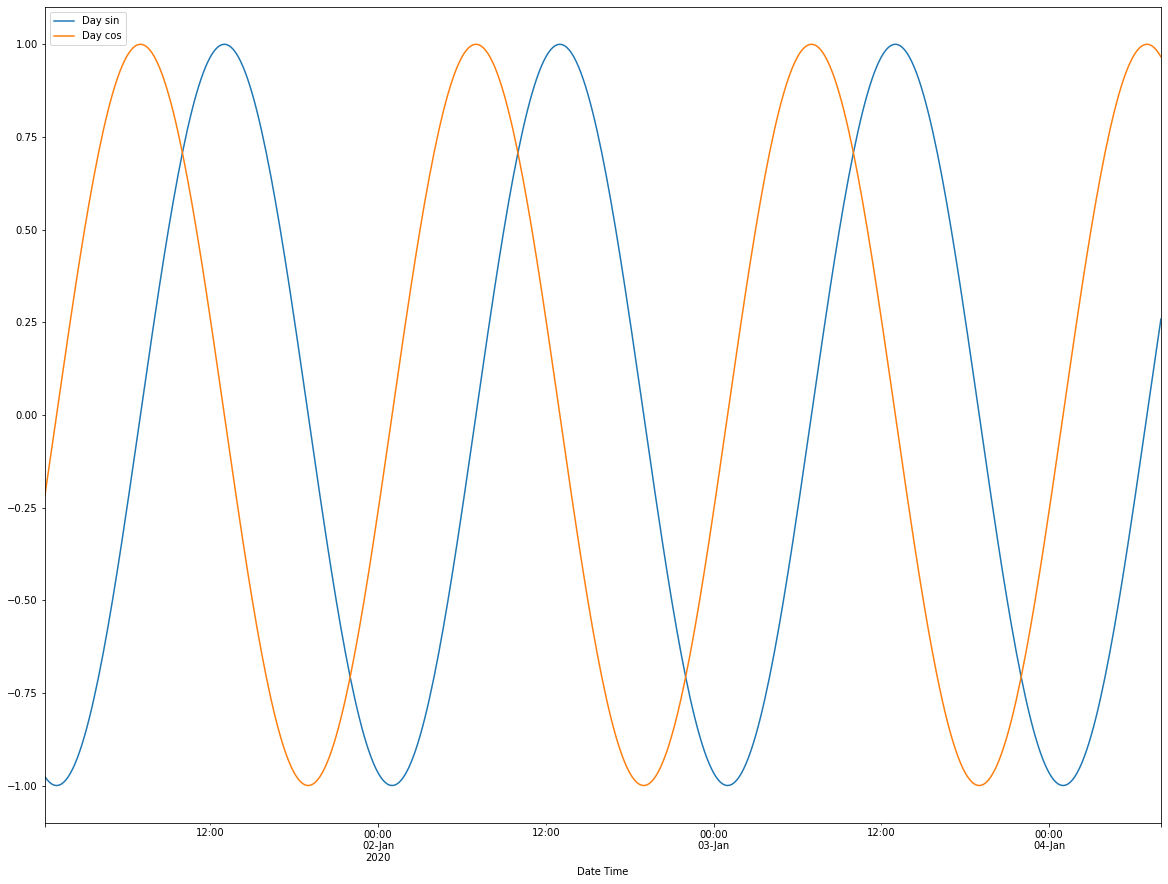

In [14]:
plt.figure(figsize=(8, 6))
_ = df[['Day sin', 'Day cos']][:480].plot()
plt.show()

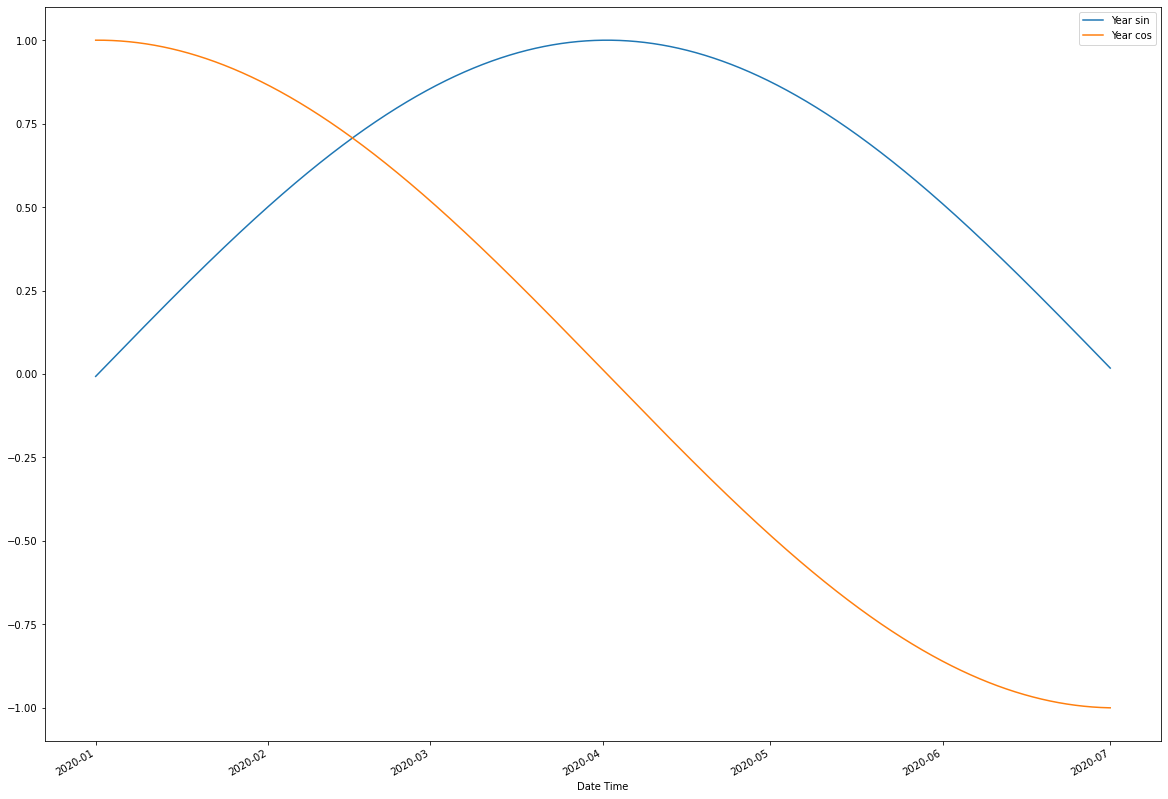

In [15]:
_ = df[['Year sin', 'Year cos']].plot()
plt.show()

### Feature Scaling & Selection

We might find some columns with the identical shapes in the above line graphs, therefore we will check whether there is any redundant column(s).

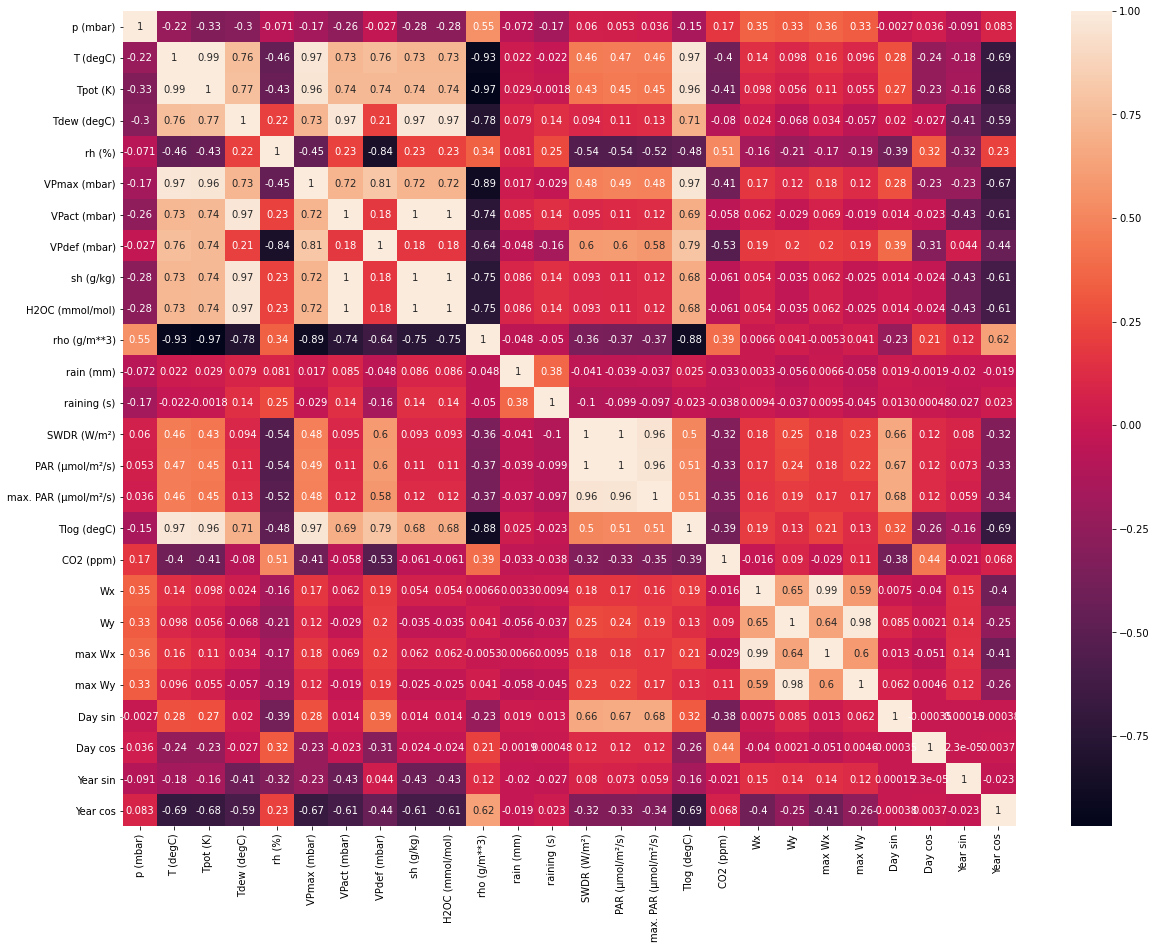

In [16]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
drop_columns = ['Tpot (K)', 'H2OC (mmol/mol)', 'SWDR (W/m²)']
df.drop(columns=drop_columns, inplace=True)

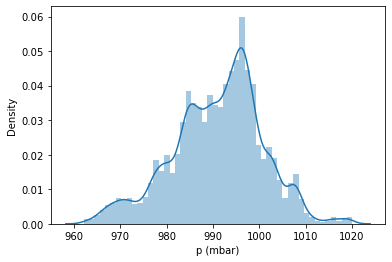

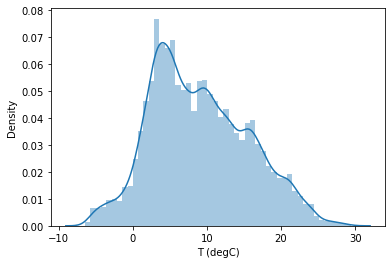

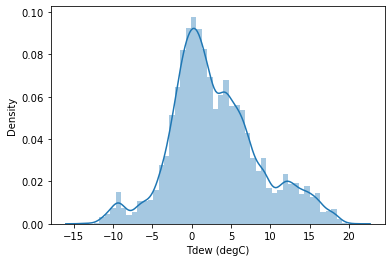

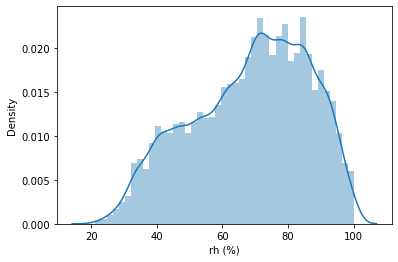

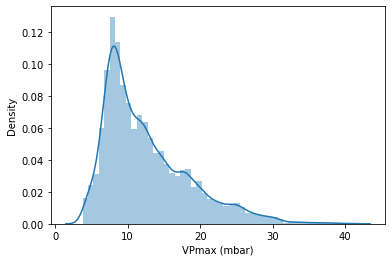

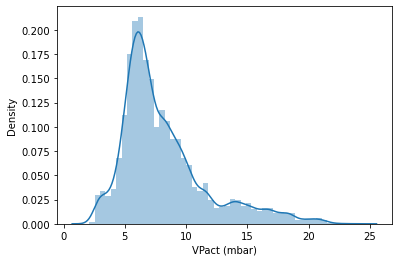

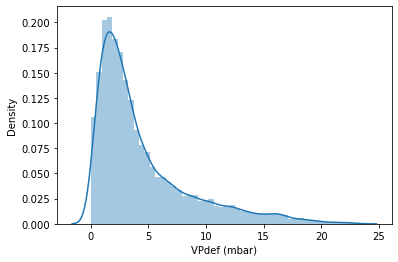

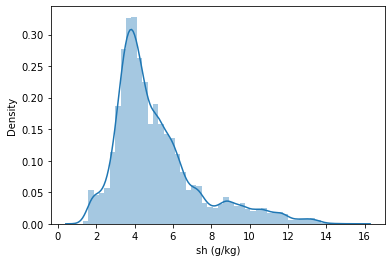

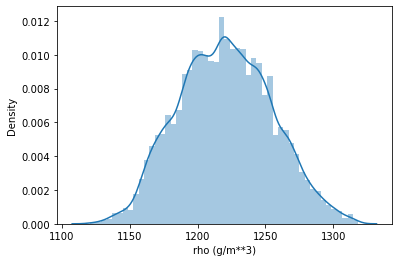

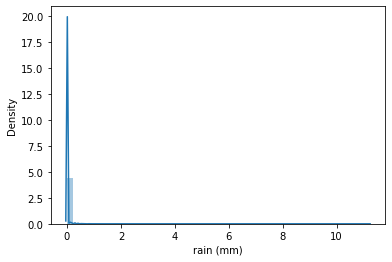

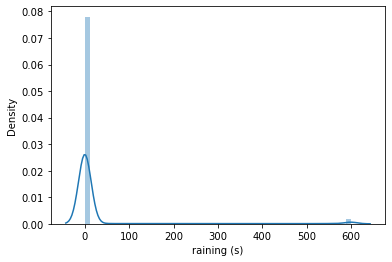

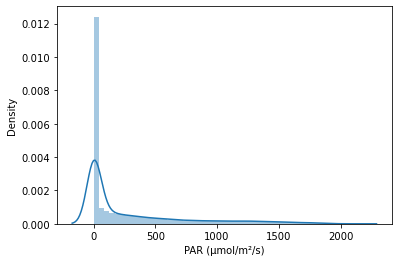

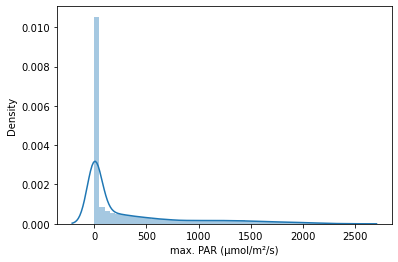

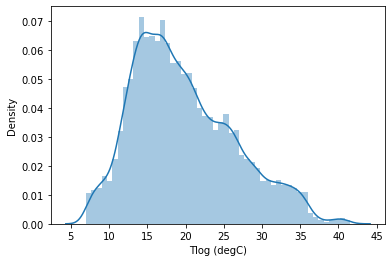

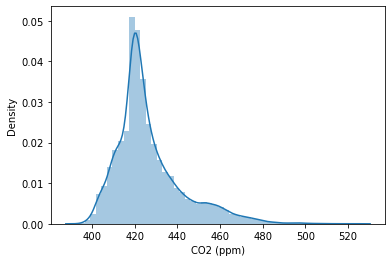

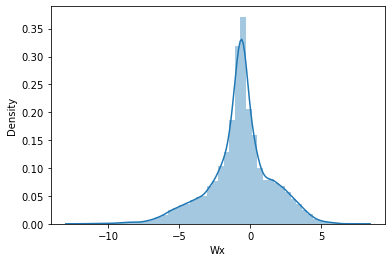

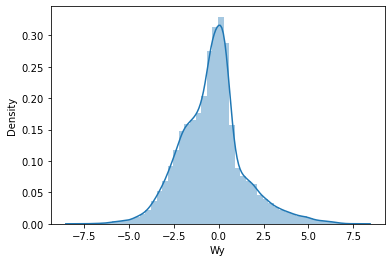

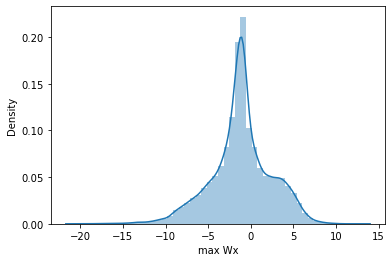

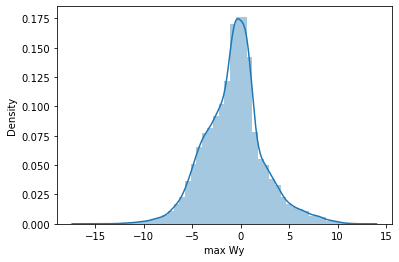

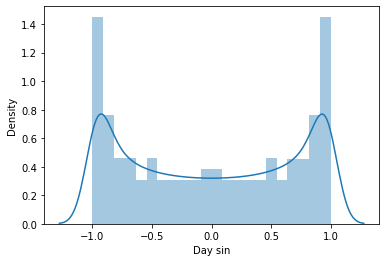

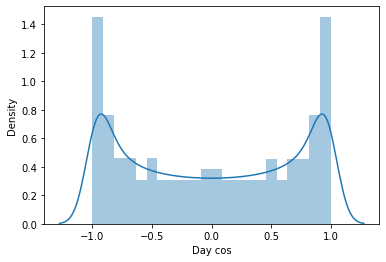

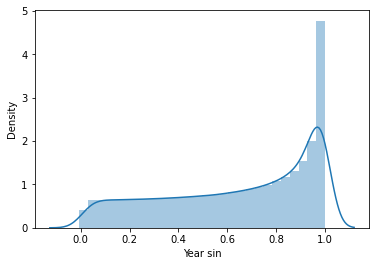

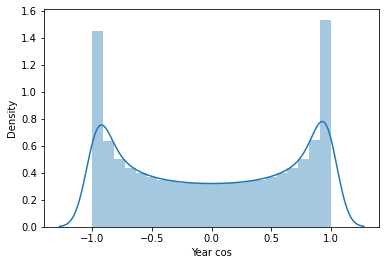

In [18]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.distplot(df[col])
    plt.show()

The outliers in `rain (mm)` and `raining (s)` may affect the data. 

After some researches, we know that rain can be classified as follows:
- Light rain — when the precipitation rate is < 2.5 mm (0.098 in) per hour
- Moderate rain — when the precipitation rate is between 2.5 mm (0.098 in) – 7.6 mm (0.30 in) or 10 mm (0.39 in) per hour.
- Heavy rain — when the precipitation rate is > 7.6 mm (0.30 in) per hour, or between 10 mm (0.39 in) and 50 mm (2.0 in) per hour.
- Violent rain — when the precipitation rate is > 50 mm (2.0 in) per hour.

We can use binning to represent these information.

In [19]:
rain = df.pop('rain (mm)')
raining = df.pop('raining (s)')

total_rain = rain
df['No rain'] = total_rain == 0
df['Light rain'] = (total_rain < (2.5 / 6)) & (total_rain > 0)
df['Moderate/Heavy/Violent rain'] = (total_rain >= (2.5 / 6))

df[['No rain', 'Light rain', 'Moderate/Heavy/Violent rain']].value_counts(sort=True)

No rain  Light rain  Moderate/Heavy/Violent rain
True     False       False                          25210
False    True        False                            843
         False       True                             147
dtype: int64

Split the data.

In [20]:
n = len(df)
split_train_size, split_val_size = 0.7, 0.2
train_df = df[0 : int(n * split_train_size)]
val_df = df[int(n * split_train_size) : int(n * (split_train_size + split_val_size))]
test_df = df[int(n * (split_train_size + split_val_size)):]

n_features = df.shape[1]

Normalize the data.

In [21]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

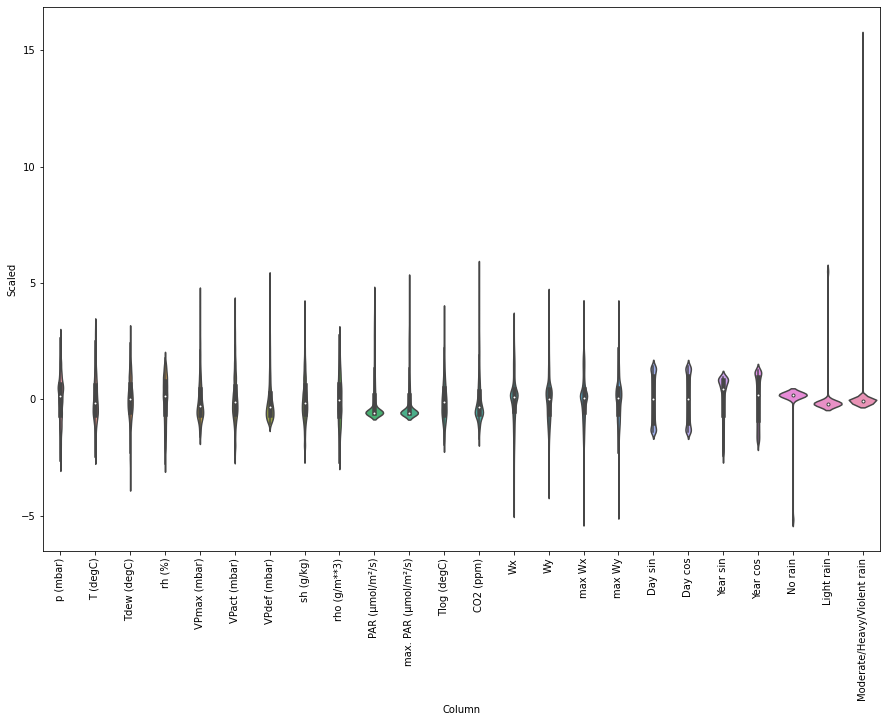

In [22]:
#Plot the distribution
df_std = train_df.melt(var_name='Column', value_name='Scaled')
plt.figure(figsize=(15, 10))
ax = sns.violinplot(x='Column', y='Scaled', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Data windowing

The idea is got from: https://www.tensorflow.org/tutorials/structured_data/time_series

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data.

The main features of the input windows are:

- The width (number of time steps) of the input and label windows
- The time offset between them.
- Which features are used as inputs, labels, or both.

Depending on the task and type of model you may want to generate a variety of data windows. 
For example, to make a single prediction 1h into the future, given 2h of history you might define a window with: `input_width = 12`, `output_with = 6` (since each record is in 10-minutes period).


The `WindowGenerator` class can:
- Handle the indexes and offsets.
- Split windows of features into a (features, labels) pairs.
- Plot the content of the resulting windows.
- Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.

In [23]:
class WindowGenerator():
    """
    Create a window of consecutive samples of data.
    Use to make a set of predictions which can benefit training.
    ------
    Args:
        input_width (int):
            Number of consecutive history data.
        label_width (int):
            Number of future data we want to predict/show.
            If it is None, all the future data from 'shift' is shown.
        shift (int):
            Number of consecutive future data.
        train_df (pd.DataFrame):
            Training data.
        val_df (pd.DataFrame):
            Validation data.
        test_df (pd.DataFrame):
            Test data.
        label_columns (list of str, pd.Index or None):
            List of columns that we want to use.
    """
    
    def __init__(self, input_width, shift, label_width=None,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        # Work out the label column indices
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}
        
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        # slice(a, b) function will return a slice object.
        # arr[slice(a, b)] = arr[a:b]
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        """
        Convert list of consecutive inputs into a window of inputs and a window of labels (output).
        -------
        Args:
            features: EagerTensor
                List of consecutive inputs
        -------
        Returns:
            inputs: EagerTensor
            labels: EagerTensor
        """
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                    [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                    axis=-1
            )
        
        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.`
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, (8/3)*max_subplots))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [*10 minutes]')
        
    def make_dataset(self, data):
        """
        Convert the DataFrame into a tf.data.Dataset.
        ------
        Args:
            data: DataFrame
                The input data.
        ------
        Returns:
            ds: tf.data.Dataset of (input_window, label_window)    
        """
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,
        )

        ds = ds.map(self.split_window)
        
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.test))
            # And cache it for next time
            self._example = result
        return result

In [24]:
w1 = WindowGenerator(input_width=24, label_width=24, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['T (degC)']

In [25]:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 48, 24)
Inputs shape: (3, 24, 24)
labels shape: (3, 24, 1)


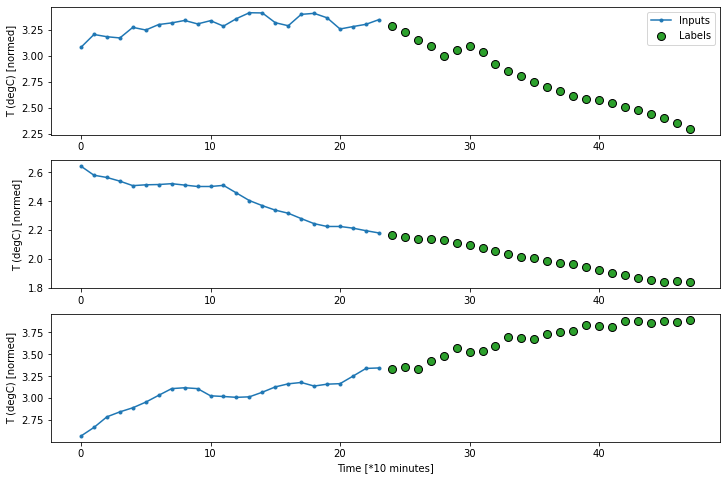

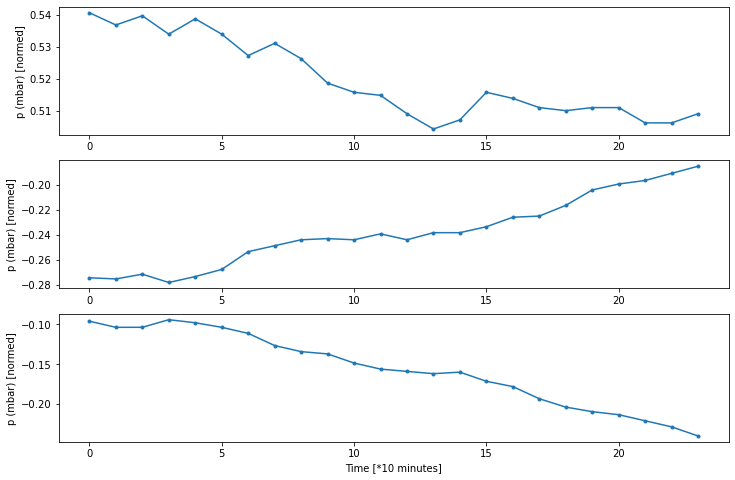

In [26]:
w1.plot()
w1.plot(plot_col='p (mbar)')

In [27]:
w1.train.element_spec

(TensorSpec(shape=(None, 24, 24), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 24, 1), dtype=tf.float32, name=None))

In [28]:
for example_inputs, example_labels in w1.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 24)
Labels shape (batch, time, features): (32, 24, 1)


### Modelling

Package the training procedure into a function:

In [29]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=5, path_checkpoint='model_checkpoint.h5', opt='Adam'):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')
    
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(monitor="val_loss", 
                                                          filepath=path_checkpoint,
                                                          verbose=0,
                                                          save_weights_only=True,
                                                          save_best_only=True)
    
    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=opt)
    
    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        verbose=0,
                        validation_data = window.val,
                        callbacks=[early_stopping])
    
    return history

In [30]:
def visualize_loss(history, title="Training and Validation Loss"):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure(figsize=(6,6))
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [31]:
def training_package(model, window, plot_cols=['T (degC)']):
    print('Training model')
    history = compile_and_fit(model, window)
    
    print('Model summary')
    print(model.summary())
    
    print('Visualize loss')
    visualize_loss(history)
    
    print('Prediction result samples')
    for plot_col in plot_cols:
        window.plot(model=model, plot_col=plot_col)
    
    val_error = model.evaluate(window.val)
    test_error = model.evaluate(window.test)
    print(f'Validation error: {val_error}')
    print(f'Test error: {test_error}')

**Sample data:** predict the next 6 hours given 6 hours' history data.

In [32]:
HISTORY_HOURS = 3.0
PREDICT_HOURS = 1.0

input_width = int(HISTORY_HOURS * 6)
label_width = int(PREDICT_HOURS * 6)

**Linear Regression**

Implement Linear Regression Model with *single-time-step*, *multiple-input* and *single-output* prediction.

Sample window:

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Label indices: [23]
Label column name(s): ['T (degC)']

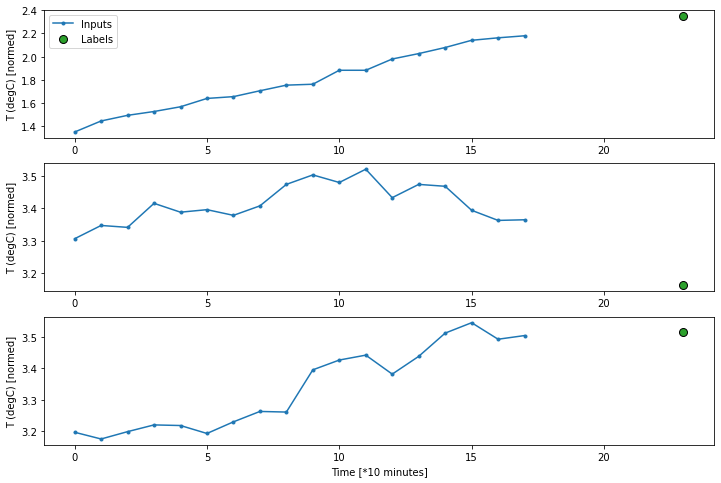

In [33]:
window_onef = WindowGenerator(input_width=input_width,
                        label_width=1,
                        shift=label_width,
                        label_columns=['T (degC)'])

window_onef.plot()
window_onef

In [34]:
linear_onef = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

Training model
Model summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 432)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 433       
_________________________________________________________________
reshape (Reshape)            (None, 1, 1)              0         
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
Visualize loss


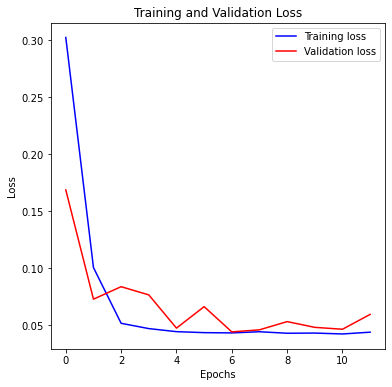

Prediction result samples
82/82 [==============================] - 0s 813us/step - loss: 0.1090
Validation error: 0.059393081814050674
Test error: 0.10904046893119812


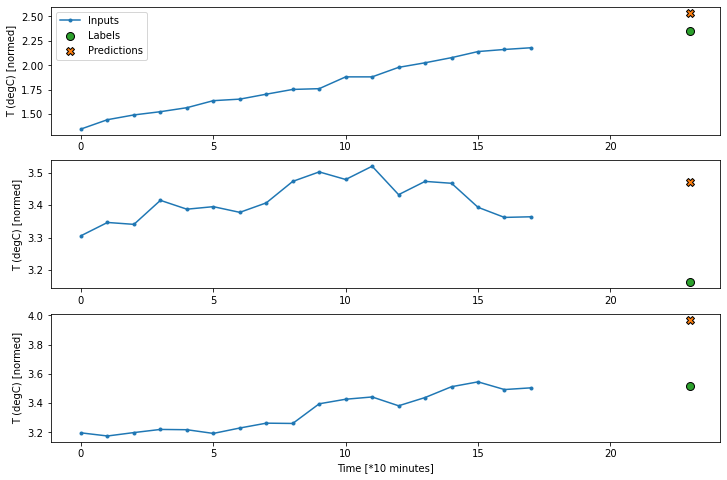

In [35]:
training_package(linear_onef, window_onef)

Trying some real number test.

In [36]:
ds = tf.constant([np.array(test_df[:18])])
prediction = linear_onef(ds)
prediction

<tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[3.1845107]]], dtype=float32)>

In [37]:
prediction * train_std['T (degC)'] + train_mean['T (degC)']

<tf.Tensor: shape=(1, 1, 1), dtype=float32, numpy=array([[[22.716757]]], dtype=float32)>

In [38]:
test_df.iloc[23]['T (degC)'] * train_std['T (degC)'] + train_mean['T (degC)']

21.65

We can see that the model is somehow accurate. The difference between 21.65 and 21.89 is not big.

But linear regression may only deal with short offset and with single-output only.

Implement Linear Regression Model with *single-time-step*, *multiple-input* and *multiple-output* prediction.

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Label indices: [23]
Label column name(s): None

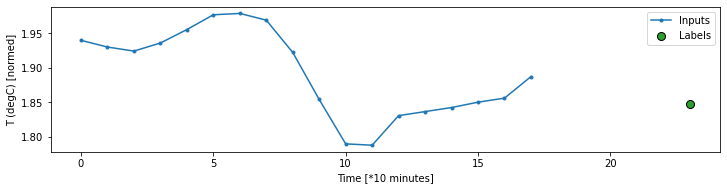

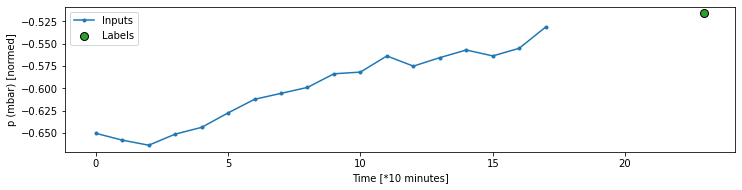

In [39]:
window_mulf = WindowGenerator(input_width=input_width,
                        label_width=1,
                        shift=label_width)

window_mulf.plot(plot_col='T (degC)', max_subplots=1)
window_mulf.plot(plot_col='p (mbar)', max_subplots=1)
window_mulf

In [40]:
n_features = len(df.columns)
linear_mulf = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=n_features),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, n_features]),
])

Training model
Model summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 432)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                10392     
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 24)             0         
Total params: 10,392
Trainable params: 10,392
Non-trainable params: 0
_________________________________________________________________
None
Visualize loss


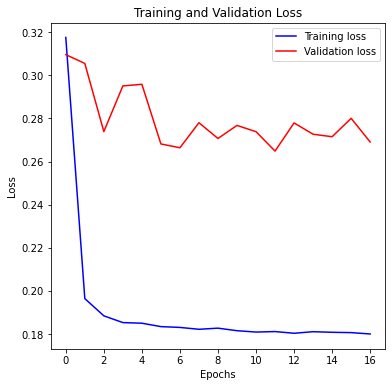

Prediction result samples
82/82 [==============================] - 0s 827us/step - loss: 0.3883
Validation error: 0.2690775692462921
Test error: 0.38829365372657776


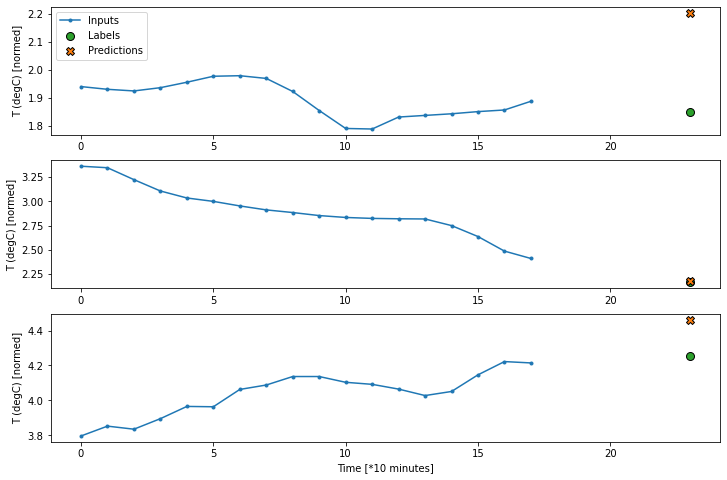

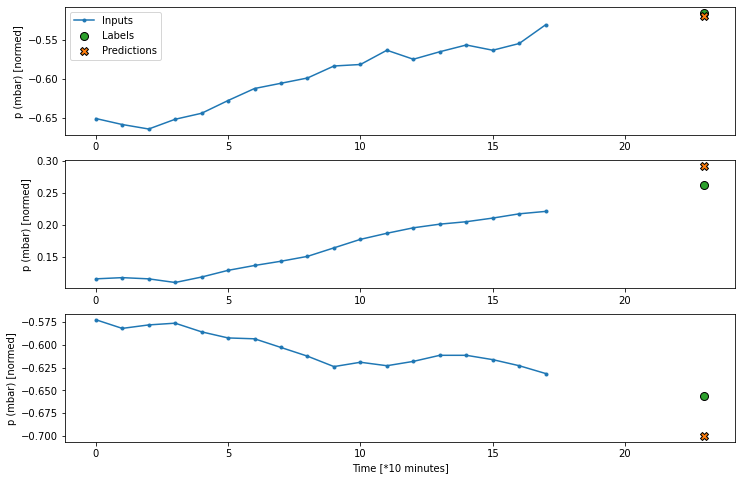

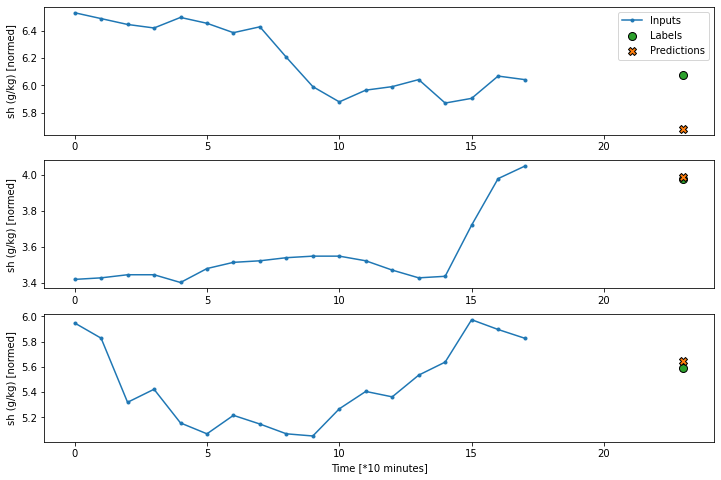

In [41]:
training_package(linear_mulf, window_mulf, plot_cols=['T (degC)', 'p (mbar)', 'sh (g/kg)'])

**Multilayer Perceptron (MLP)**

In [42]:
mlp_onef = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

Training model
Model summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 432)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 3464      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
_________________________________________________________________
reshape_2 (Reshape)          (None, 1, 1)              0         
Total params: 3,545
Trainable params: 3,545
Non-trainable params: 0
_________________________________________________________________
None
Visualize loss


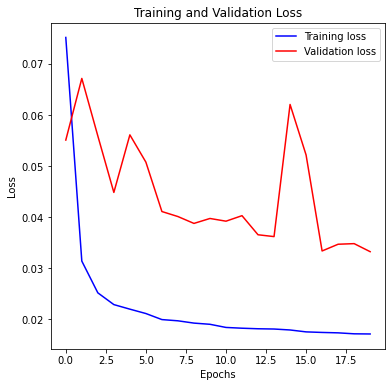

Prediction result samples
82/82 [==============================] - 0s 2ms/step - loss: 0.0847
Validation error: 0.033253174275159836
Test error: 0.08474548906087875


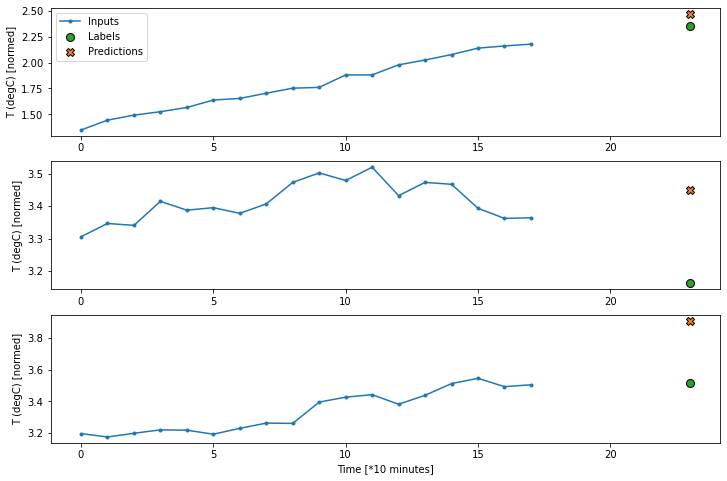

In [43]:
training_package(mlp_onef, window_onef)

Training model
Model summary
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 432)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 3464      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 24)                216       
_________________________________________________________________
reshape_3 (Reshape)          (None, 1, 24)             0         
Total params: 3,752
Trainable params: 3,752
Non-trainable params: 0
_________________________________________________________________
None
Visualize loss


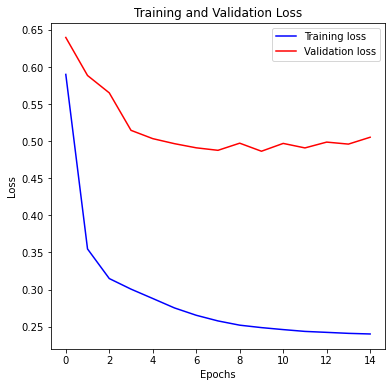

Prediction result samples
82/82 [==============================] - 0s 765us/step - loss: 1.2908
Validation error: 0.5052934885025024
Test error: 1.2908467054367065


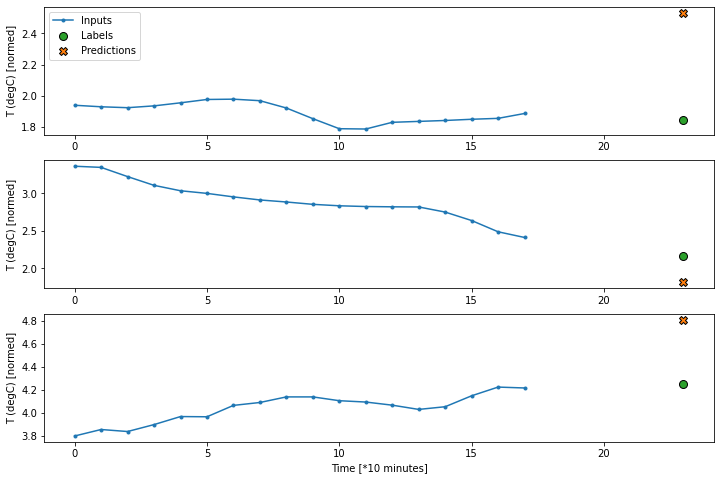

In [44]:
dense_mulf = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=n_features),
    tf.keras.layers.Reshape([1, n_features]),
])
training_package(dense_mulf, window_mulf)

**LSTM**

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Label indices: [18 19 20 21 22 23]
Label column name(s): ['T (degC)']

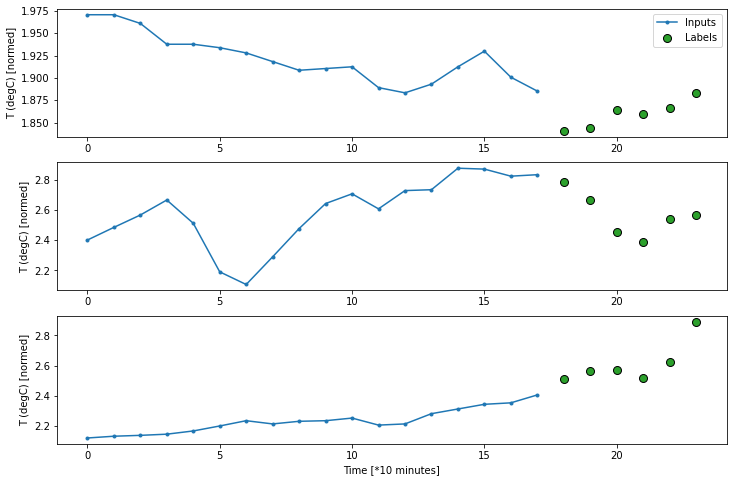

In [45]:
HISTORY_HOURS = 3.0
PREDICT_HOURS = 1.0

input_width = int(HISTORY_HOURS * 6)
label_width = int(PREDICT_HOURS * 6)

lstm_window = WindowGenerator(
    input_width=input_width, label_width=label_width, shift=label_width,
    label_columns=['T (degC)']
)

lstm_window.plot()
lstm_window

Training model
Model summary
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
_________________________________________________________________
reshape_4 (Reshape)          (None, 1, 1)              0         
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
_________________________________________________________________
None
Visualize loss


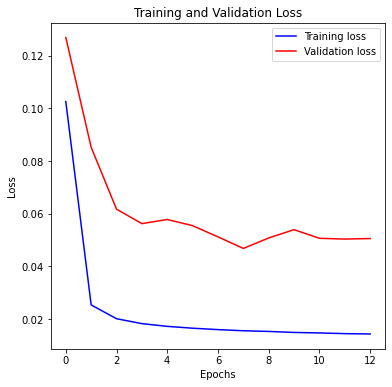

Prediction result samples
82/82 [==============================] - 0s 2ms/step - loss: 0.4307
Validation error: 0.050599828362464905
Test error: 0.4306691288948059


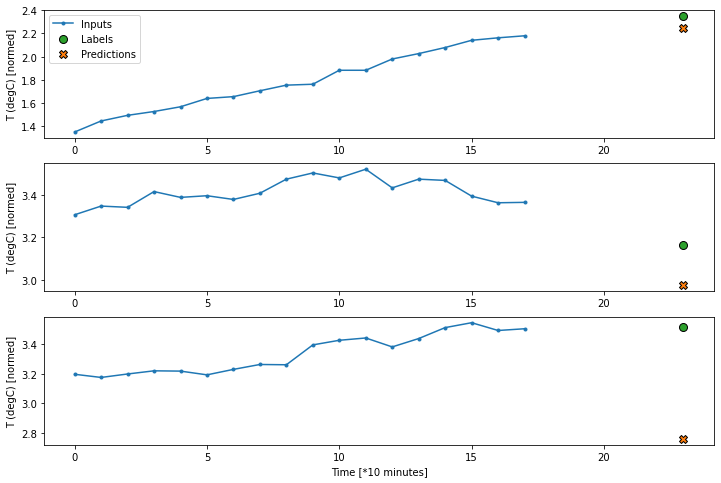

In [46]:
lstm = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(units=8),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1]),
])

training_package(lstm, window_onef)